# Match to profile

This module performs match analysis to find genes or features that match a given phenotype best.

---
>**Edwin Juarez PhD**, UC San Diego, School of Medicine<br>
**Forrest Kim**, UC San Diego, School of Medicine<br>

<small>***Note:*** If you are unfamilar with the Jupyter Notebook or GenePattern Notebook environments, please complete the <a href="#">**GP Notebook Tutorial**</a> before continuing.</small>

<a href="#Differential-Expression-Module" class="btn btn-info" style="text-decoration: none;">Go to Module</a>

### Table of Contents

---
>1. [Introduction](#Introduction)
2. [**Match to Profile Module**](#Differential-Expression-Module)
3. [Documentation](#Documentation)
    1. [Parameters](#Parameters)
    2. [Input](#Input)
    3. [Output](#Output)
    4. [Version Information](#Version-Information)
4. [References](#References)


<div class="alert alert-info">
For example, you could use this module to find genes whose expression levels match and oppose a specific gene expression for a given set of samples. In this notebook we will use gene M89957_at [IGB Immunoglobulin-associated beta (B29)] as the profile to match.

A note on some of the parameters we are using:
- **gene expression**: We use the classic ALL/AML microarray dataset http://datasets.genepattern.org/all_aml/all_aml_test.gct

- **phenotype input method**: We use the default value **Index**. GCT files are by default indexed by their first column (which should containe gene name).

- **phenotype file**: We leave this blank because in this example we are not using a CLS file to identify the samples' phenotype.

- **name of phenotype to match**: Within the GCT file we provide we will use the gene **M89957_at**.

### Match to Profile Module

In [4]:
import genepattern
import cuzcatlan as cusca

from cuzcatlan import match_to_profile
import pandas as pd
import urllib.request
from cuzcatlan import compute_information_coefficient
from cuzcatlan import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(match_to_profile, name="Differential gene expression, continous pheotype.", 
                        description="Sort genes according to their association with a continuous phenotype or class vector.",
                        parameters={
                            "phenotype_input_method":{"description":"Select from the dropdown the type of input you have provided",
                                                      "default": "Index",
                                                      "choices":{'CLS --> Fill out the "phenotype file" parameter':"CLS",
                                                                 'Name --> Fill out the "phentype column" and "name of phenotype to match" parameters':"Name",
                                                                 'Index --> Fill out the "name of phenotype to match" parameter with value of index':"Index"
                                                                }
                                                     },
                            "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a continuous phenotype or class vector.', function_import='match_to_profile', name='Differential gene expression, continous pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'phenotype_input_method', 'label': 'phenotype_input_method', 'optional': False, 'default': 'Index', 'description': 'Select from the dropdown the type of input you have provided', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'CLS --> Fill out the "phenotype file" parameter': 'CLS', 'Name --> Fill out the "phentype column" and "name of phenotype to match" parameters': 'Name', 'Index --> Fill out the "name of phenotype to match" parameter with value of index': 'Index'}}, {'name': 'phenotype_file', 'label': 'phenotype_file', 'optional': True, 'default': 'None', 'description': 'Type the file name of the CLS file where the phenotypes are listed', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'phenotype_column', 'label': 'phenotype_column', 'optional': True, 'default': 'Index', 'description': 'The column name in the GCT file where the gene name is present', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'name_of_phenotype_to_match', 'label': 'name_of_phenotype_to_match', 'optional': True, 'default': 'None', 'description': 'The row/gene names the phenotype to match', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': True, 'default': 'None', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': True, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Pearson Correlation Matching': 'custom_pearson_corr', 'Information Correlation Matching': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': 'Differential Expression Results', 'description': 'The title of the heatmap', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x10a4e08c8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


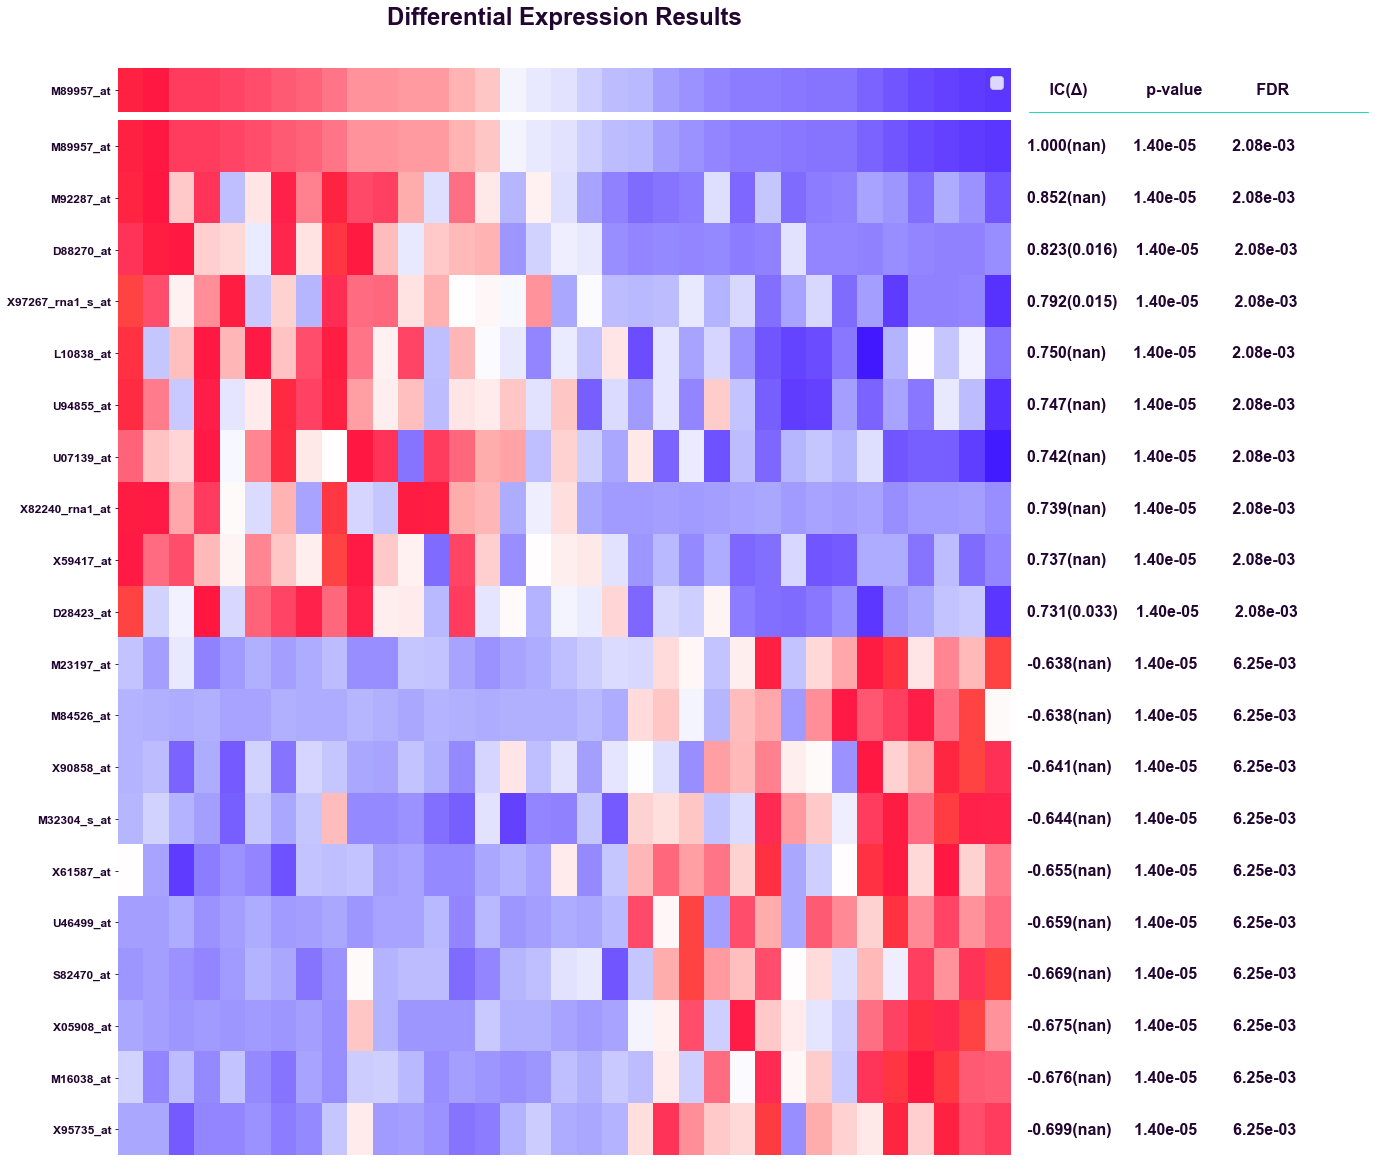

In [6]:
diffex_results = match_to_profile(gene_expression="all_aml_test.gct", phenotype_input_method="Index", phenotype_file="None", phenotype_column="Index", name_of_phenotype_to_match="M89957_at", output_filename="None", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="Differential Expression Results", random_seed=20121020)

# Documentation

### Key Parameters
>1. **gene expression**
    1. Gene (or other) expression data filename (.gct or .txt file) or python DataFrame object where rows are genes and columns are samples.
        1. ex: workshop_BRCA_filtered.gct
2. **phenotype input method**
    1. Phenotype of each sample in input_gene_expression file (array, Series where indices match , or row of GCT file)
        1. ex: workshop_BRCA_labels.cls
3. **max number of genes to show**
    1. The number of most differentially expressed genes to show in the output plot (e.g., if this value is 5, a total of 10 genes (up/down-regulated) will be shown for each phenotype comparison).
        1. 20 **(default)**
4. **ranking method** 
    1. The function used to perform the differential expression analysis. The choice of ranking_method also specifies the statistical significance calculation.
        1. Information coefficient **(default)** - accurate, but slow
        2. Pearson correlation - fast, but less accurate (linear associations only)
        3. Signal to noise ratio - 
        4. T-test statistic - over-optimistic
        5. Spearman correlation - useful for gene rankings
5. **number of permutations**
    1. Number of random permutations to estimate statistical significance (p-values and FDRs)
        1. 10 **(default)**

### Additional Notes
**Ranking Method:**  For non-linear and non-functional associationg, Pearson correlation is less adequate than other methods that are based on rank correlation or information-theory. (1) 

## Input
To use this module, you will need expression data (in the GCT or TXT file format) and the corresponding phenotype labels (in the CLS file format). Feel free to substitute your own data, for each of the example files.


> **Example Dataset**:   
>
>> This dataset comes from "Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression Monitoring" (<a href="#">Golub <em>et al.</em> 1999</a>).
>>>[**aml_all_test.gct**](https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct) - Expression Data for BRCA RNASeq dataset

>This study used clustering and prediction algorithms to find genes that distinguish between two types of acute leukemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). Specifically, they used a class discovery and prediction method to demonstrate that cancer classification was feasible using gene expression monitoring, while being indepenendent of previous biological knowledge. The tested dataset comes from sequencing of 38 bone marrow samples from acute leukemia patients. 


## Output
The Differential Gene Expression Module will output 

>1. **Differential_expression_heatmap**
    1. A PNG file of a heatmap showing the “n_top_hits_to_display” most differentially expressed genes in each phenotype comparison. Includes the confidence intervals for the metric and statistical significance results.
2. **Differential_expression_results**
    1. A tab-separated TXT file which contains the results of the entire differential expression analysis, the confidence intervals for the metric and statistical significance results.
3. **Returns**
    1. This function returns (python) a data frame showing the same genes as the heatmap (gene_to_show x 2 entries).

## Tutorial: Identification of differentially expressed genes from BRCA patient RNAseq data
In this tutorial, we will show you how to use the **Differential Expression Module** to identify differentially expressed genes from a preprocessed BRCA RNAseq dataset. 

### Step 1: Loading Data
<div class="alert alert-info">
1. First, load the expression data ([**workshop_BRCA_filtered.gct**](https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_filtered.gct)) into the `gene expression` field by pasting or dragging and dropping the url into the empty field.<br>
2. Then, load the corresponding phenotype label file ([**workshop_BRCA_labels.cls**](https://raw.githubusercontent.com/genepattern/differential-expression-modalities/master/data/workshop_BRCA_labels.cls)) into the `phenotype file` field.
</div>

### Step 2: Set the Parameters
<div class="alert alert-info">
1. Next, set appropriate values for the corresponding parameters:<br>
`output filename`: workshop_BRCA_de<br>
`ranking method`: Information coefficient<br>
`title`: Differential gene expression in filtered TCGA BRCA RNAseq dataset<br>
`random seed`: 20121020 <br>
`output variable`: de_results <br>
2. Keep the remaining parameters as their default values.
</div>

See the [**Parameters**](#Parameters) section for a more detailed description of each parameter.

### Step 3: Run the Analysis
<div class="alert alert-info">
1. Now, run the analysis by pressing the `Run` button.
</div>

While running, the module will display the progress 

### Step 3: View Results and Interpretation
There are three ways to view the results of this analysis, a heatmap, TXT file, and Pandas Dataframe (or other python package). By default, the module generates a heatmap from the differential expression analysis results, which will show the 

- How the view the results
    - Heatmap
    - TXT file
    - Pandas Dataframe (if you supplied a variable name for the output)
- How to interpret these results
    - Discuss Heatmap
        - Define axes
            - Gene names
            - Expression level
            - 
        - Define color range (what they represent and their corresponding values)
    - Discuss IC/pearson scores (we could do either)
        - Reference the originial paper
    - 

## References
<small>
1. Benjamini Y, Hochberg Y. Controlling the False Discovery Rate: A Practical and Powerful Approach to Multiple Testing. Journal of the Royal Statistical Society. Series B (Methodological). 1995;57(1):289-300. 
2. Golub T, Slonim D, et al. Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression. Science. 1999;286:531-537. 
3. Good P. Permutation Tests: A Practical Guide for Testing Hypotheses, 2nd Ed. New York: Springer-Verlag. 2000. 
4. Gould J, Getz G, Monti S, Reich M, Mesirov JP. Comparative gene marker selection suite. Bioinformatics. 2006;22;1924-1925, doi:10.1093/bioinformatics/btl196. 
5. Lu J, Getz G, Miska E, et al. MicroRNA Expression Profiles Classify Human Cancers. Nature. 2005;435:834-838. 
6. Storey JD, Tibshirani R. Statistical significance for genomewide studies. PNAS. 2003;100(16):9440-9445. 
7. Westfall PH, Young SS. Resampling-Based Multiple Testing: Examples and Methods for p-Value Adjustment, in Wiley Series in Probability and Statistics. New York: Wiley, 1993.
</small>

<a href="#Differential-(gene)-Expression" class="btn btn-info" style="text-decoration:none;">To Top</a>